In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils import resample, shuffle

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, Dropout, Bidirectional, LSTM, GlobalMaxPool1D, Dense

import gensim
from sklearn.metrics import auc
from scipy import interp
from itertools import cycle

In [2]:
import warnings
from collections import Counter, OrderedDict
from pathlib import Path
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter
import seaborn as sns

In [4]:
from textblob import TextBlob, Word

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline

In [6]:
import lightgbm as lgb
import json
from time import clock, time

In [7]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [8]:
df = pd.read_csv('/Users/r.shyaamprasadh/Downloads/Final_data.csv')

In [9]:
df.head(5)

,Title of the News,News Date,News Source,client,country,sentiment
0,Big Tobacco gets a pandemic pick-me-up,19/11/2020,Reuters News,"Altria Group, Inc.",US,neutral
1,INSIGHT-Big Tobacco gets a pandemic pick-me-up,19/11/2020,Reuters News,"Altria Group, Inc.",US,neutral
2,Altria to convert non-voting shares in Juul to...,12/11/2020,Reuters News,"Altria Group, Inc.",US,neutral
3,Marlboro maker Altria takes $2.6 billion hit a...,30/10/2020,Reuters News,"Altria Group, Inc.",US,neutral
4,UPDATE 3-Marlboro maker Altria takes $2.6 bln ...,30/10/2020,Reuters News,"Altria Group, Inc.",US,neutral


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505994 entries, 0 to 505993
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Title of the News  505994 non-null  object
 1   News Date          505994 non-null  object
 2   News Source        505994 non-null  object
 3   client             505994 non-null  object
 4   country            505994 non-null  object
 5   sentiment          505994 non-null  object
dtypes: object(6)
memory usage: 23.2+ MB


In [11]:
df['News Date']= pd.to_datetime(df['News Date'])

In [12]:
df = df.sort_values(by="News Date")

In [13]:
df.head(5)

,Title of the News,News Date,News Source,client,country,sentiment
494868,"Taliban claim attacks that killed CIA agents, ...",2010-01-01,malaysiakini,The Southern Company,MY,negative
255984,"For CIA, Afghan attack a historic blow",2010-01-01,malaysiakini,"Center International Group Co.,Ltd.",MY,neutral
256465,N Korea calls for end to hostile relations wit...,2010-01-01,malaysiakini,China Building Material Test & Certification G...,MY,neutral
481205,"'Allah' ban: 'Accept decision, let's move on'",2010-01-01,malaysiakini,Church & Dwight,MY,neutral
253717,BN and the people: 'Pagar makan padi',2010-01-01,malaysiakini,Power Assets Holdings Limited,MY,neutral


In [14]:
print ("Total number of news:", df.shape[0])

Total number of news: 505994


In [15]:
df['News Source'].value_counts()

Reuters News      195851
Bloomberg News    122093
Google News        99949
malaysiakini       70795
CNN News           16225
Forbes News         1081
Name: News Source, dtype: int64

In [16]:
Client= pd.DataFrame(df['client'].value_counts())
Client1=Client.reset_index()
Client2=Client1.rename(columns={'index': 'Client_Name', 'client': 'News_count'})
Client2.sort_values("Client_Name", inplace = True)
Client2.drop_duplicates(subset ="Client_Name",keep = False, inplace = True)

In [17]:
Client2

,Client_Name,News_count
695,3M Company,175
581,3i Group plc,211
842,A. O. Smith Corporation,139
0,AAC Technologies Holdings Inc.,10549
161,AB InBev SA-NV,649
...,...,...
771,Yokogawa Electric Corporation,154
66,Zee Entertainment Enterprises Ltd.,1148
82,adidas AG,966
81,eBay Inc.,974


In [18]:
print("Total Number of stocks",Client2.shape[0])

Total Number of stocks 1417


In [19]:
df.columns

Index(['Title of the News', 'News Date', 'News Source', 'client', 'country',
       'sentiment'],
      dtype='object')

In [20]:
df1=df.drop(columns=['News Date', 'News Source','client', 'country'])
df1=df1.rename(columns={'Title of the News': 'sentence', 'Text_blob': 'sentiment'})

In [21]:
df1

,sentence,sentiment
494868,"Taliban claim attacks that killed CIA agents, ...",negative
255984,"For CIA, Afghan attack a historic blow",neutral
256465,N Korea calls for end to hostile relations wit...,neutral
481205,"'Allah' ban: 'Accept decision, let's move on'",neutral
253717,BN and the people: 'Pagar makan padi',neutral
...,...,...
190623,UPDATE 2-U.S. holiday retail sales rise 3% as ...,neutral
153856,Philippines evaluating emergency use for Pfize...,neutral
29087,"China's industrial profits grow robustly, seve...",positive
129534,China central bank urges Ant Group to set 'rec...,neutral


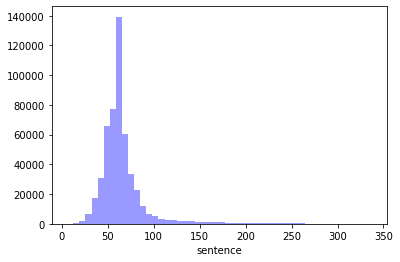

In [22]:
sns.distplot(df1['sentence'].str.len(),color='blue',kde=False);

In [23]:
df_2 = df1[(df1['sentence'].str.len()<=100)]
df_3=df_2[(df_2['sentence'].str.len()>=20)]

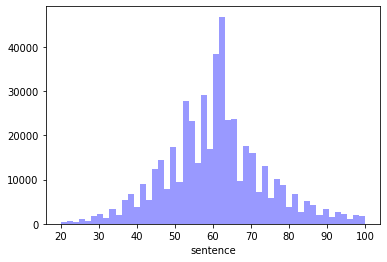

In [24]:
sns.distplot(df_3['sentence'].str.len(),color='blue',kde=False);

In [25]:
df_3['sentiment'].value_counts()

neutral     311529
positive    108847
negative     55995
Name: sentiment, dtype: int64

In [26]:
df_3.shape

(476371, 2)

In [27]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476371 entries, 494868 to 36398
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentence   476371 non-null  object
 1   sentiment  476371 non-null  object
dtypes: object(2)
memory usage: 10.9+ MB


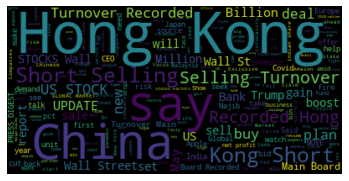

In [28]:
combined_text = " ".join([review for review in df_3['sentence']])
wordcloud = WordCloud().generate(combined_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Distribution of labels 

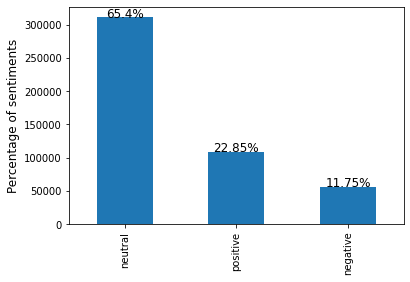

In [29]:
ax = df_3['sentiment'].value_counts().plot(kind='bar')
ax.set_ylabel('Percentage of sentiments', fontsize=12)
#ax.set_yticks(np.arange(0, 3501, 500))
total = df_3['sentiment'].size
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2., i.get_height() + 40, str(round((i.get_height()/total)*100, 2)) + '%', ha ='center', fontsize=12)
plt.show()

### Preparation of Training data

In [30]:
x = df_3.sentence
y = df_3.sentiment

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)
x_train.shape,y_train.shape

((381096,), (381096,))

In [31]:
pd.value_counts(y_train.values.flatten())

neutral     249223
positive     87077
negative     44796
dtype: int64

### Distribution of Training data

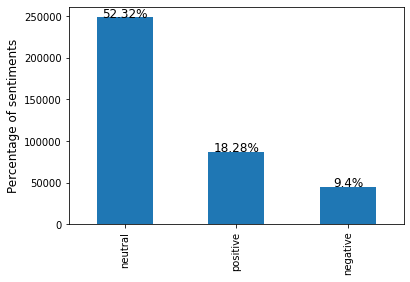

In [32]:
ax = y_train.value_counts().plot(kind='bar')
ax.set_ylabel('Percentage of sentiments', fontsize=12)
#ax.set_yticks(np.arange(0, 3501, 500))
total = df_3['sentence'].size
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2., i.get_height() + 40, str(round((i.get_height()/total)*100, 2)) + '%', ha ='center', fontsize=12)
plt.show()

### Treating Imbalance Set

In [33]:
neu_index = y_train[y_train == 'neutral'].index
pos_index = y_train[y_train == 'positive'].index
neg_index = y_train[y_train == 'negative'].index
x_train_neu, y_train_neu =resample(x_train.loc[neu_index],y_train.loc[neu_index],n_samples=len(pos_index),replace=False,random_state=7)
x_train_neg, y_train_neg =resample(x_train.loc[neg_index],y_train.loc[neg_index],n_samples=len(pos_index),replace=True,random_state=7)

x_train_resample = x_train.loc[pos_index].append([x_train_neu, x_train_neg])
y_train_resample = y_train.loc[pos_index].append([y_train_neu, y_train_neg])

In [34]:
x_train2, y_train2 = shuffle(x_train_resample,y_train_resample, random_state=7)

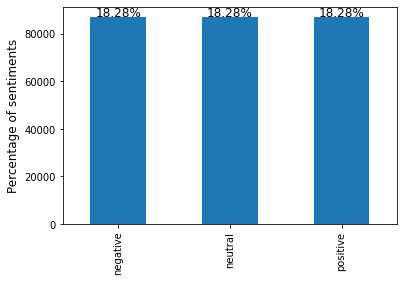

In [35]:
ax = y_train2.value_counts().plot(kind='bar')
ax.set_ylabel('Percentage of sentiments', fontsize=12)
#ax.set_yticks(np.arange(0, 3501, 500))
total = df_3['sentiment'].size
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2., i.get_height() + 40, str(round((i.get_height()/total)*100, 2)) + '%', ha ='center', fontsize=12)
plt.show()

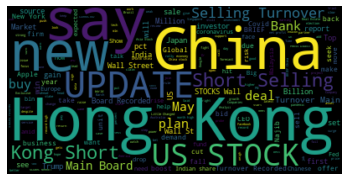

In [36]:
combined_text = " ".join([review for review in x_train2])
wordcloud = WordCloud().generate(combined_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Tokenization of the sentences  X

In [37]:
d_test=pd.read_csv('/Users/r.shyaamprasadh/Downloads/lasttendays_data.csv')

In [38]:
d_test

,news,actual_sentiment
0,"US IC Card Chip Market 2021: Trends, Technolog...",neutral
1,"Relay for 5G, Market Research Report (2020-202...",neutral
2,"Impact of COVID-19 Outbreak on Relay for 5G, M...",positive
3,Comprehensive Report on Signal Relays (Up To 2...,neutral
4,Global Oxygen Sensor Market 2020 | Current Sce...,neutral
...,...,...
19387,Mozambique Insurgents Stage Closest Attack Yet...,neutral
19388,"Over 9000 evacuated after heavy rain in Johor,...",negative
19389,Total Asks Mozambique Staff to Leave as Attack...,positive
19390,"Thailand reports 745 new coronavirus cases, on...",positive


In [39]:
x_test_d=d_test["news"]

In [40]:
y_test_d=d_test["actual_sentiment"]

#### X

In [41]:
#convert the word in sequences 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train2)

x_train2 = tokenizer.texts_to_sequences(x_train2)
x_test = tokenizer.texts_to_sequences(x_test_d) ##MODIFY

word_index = tokenizer.word_index
print("No.of words in corpus : {}".format(len(word_index)))

No.of words in corpus : 74185


In [42]:
word_index.items()

dict_items([('to', 1), ('in', 2), ('for', 3), ('on', 4), ('of', 5), ('as', 6), ('the', 7), ('update', 8), ('s', 9), ('u', 10), ('new', 11), ('a', 12), ('1', 13), ('stocks', 14), ('china', 15), ('and', 16), ('says', 17), ('with', 18), ('brief', 19), ('after', 20), ('2', 21), ('at', 22), ('is', 23), ('shares', 24), ('from', 25), ('us', 26), ('by', 27), ('up', 28), ('down', 29), ('hong', 30), ('kong', 31), ('over', 32), ('profit', 33), ('more', 34), ('oil', 35), ('3', 36), ('market', 37), ('bank', 38), ('short', 39), ('sales', 40), ('wall', 41), ('selling', 42), ('first', 43), ('high', 44), ('be', 45), ('may', 46), ('deal', 47), ('recorded', 48), ('turnover', 49), ('19', 50), ('ceo', 51), ('billion', 52), ('year', 53), ('firm', 54), ('covid', 55), ('global', 56), ('not', 57), ('data', 58), ('pct', 59), ('5', 60), ('are', 61), ('top', 62), ('board', 63), ('higher', 64), ('markets', 65), ('4', 66), ('growth', 67), ('trade', 68), ('11', 69), ('will', 70), ('earnings', 71), ('stock', 72), ('i

In [43]:
df_tokens=pd.DataFrame(tokenizer.word_counts,index=[0])
df_tokens1=pd.DataFrame(df_tokens.T)
df_tokens2=df_tokens1.reset_index()
df_tokens3=df_tokens2.rename(columns={'index': 'words', 0: 'count'})

In [44]:
df_tokens3.sort_values('count')
df_tokens3

,words,count
0,top,3978
1,4,3911
2,3rd,192
3,quarter,2329
4,trades,248
...,...,...
74180,tfl,1
74181,apm,1
74182,3987,1
74183,'smash,1


### Dictionary with most frequent words 

In [45]:
rslt_token = df_tokens3.loc[df_tokens3['count'] > 10] 
rslt_token

,words,count
0,top,3978
1,4,3911
2,3rd,192
3,quarter,2329
4,trades,248
...,...,...
49994,usher,11
50154,huntington,11
50639,rx,11
54620,pharmacyclics,11


In [46]:
token_list= rslt_token["words"].tolist()

In [47]:
print(token_list)

['top', '4', '3rd', 'quarter', 'trades', 'of', 'the', 'bill', 'gates', 'foundation', 'trust', 'breaking', 'navy', 'hill', 'developers', 'now', 'planning', 'seat', 'arena', 'massive', 'mixed', 'use', 'project', 'in', 'next', 'has', 'less', 'to', 'fear', 'than', 'most', 'a', 'no', 'deal', 'brexit', 'hp', 'hpq', 'recovery', 'mode', 'as', 'digital', 'transformation', 'pc', 'market', 'brief', 'robert', 'half', 'reports', 'q2', 'earnings', 'per', 'share', '0', '71', 'liew', 'finding', 'common', 'values', 'key', 'harmony', 'new', 'issue', 'smurfit', 'kappa', 'prices', '500', 'mln', 'euro', '2021', 'bond', 'big', 'bank', 'profits', 'are', 'about', 'wall', 'street', 'not', 'main', 'barclays', 'have', 'let', 'run', 'bailout', 'says', 'african', 'nation', 'worst', 'hit', 'by', 'covid', '19', 'falling', 'behind', 'on', 'vaccines', 'corrected', 'update', '1', 'cut', 'more', 'investment', 'banking', 'jobs', 'source', 'polymetal', 'signs', '80', 'loan', 'finance', 'gold', 'kazakhstan', 'citi', 'drops

In [48]:
new_dict={}
new_dict=dict((k, word_index[k]) for k in token_list if k in word_index)

In [49]:
print("No.of frequent words in corpus : {}".format(len(new_dict)))

No.of frequent words in corpus : 14656


In [50]:
new_dict.items()

dict_items([('top', 62), ('4', 66), ('3rd', 2007), ('quarter', 129), ('trades', 1622), ('of', 5), ('the', 7), ('bill', 500), ('gates', 4011), ('foundation', 3882), ('trust', 911), ('breaking', 3201), ('navy', 2218), ('hill', 3507), ('developers', 2194), ('now', 249), ('planning', 2262), ('seat', 2219), ('arena', 7184), ('massive', 2030), ('mixed', 822), ('use', 488), ('project', 375), ('in', 2), ('next', 237), ('has', 134), ('less', 394), ('to', 1), ('fear', 1411), ('than', 92), ('most', 117), ('a', 12), ('no', 93), ('deal', 47), ('brexit', 317), ('hp', 1805), ('hpq', 12548), ('recovery', 300), ('mode', 5460), ('as', 6), ('digital', 555), ('transformation', 4788), ('pc', 5133), ('market', 37), ('brief', 19), ('robert', 3585), ('half', 329), ('reports', 228), ('q2', 577), ('earnings', 71), ('per', 469), ('share', 139), ('0', 327), ('71', 4236), ('liew', 7766), ('finding', 3105), ('common', 758), ('values', 3883), ('key', 382), ('harmony', 7767), ('new', 11), ('issue', 339), ('smurfit', 

In [51]:
len(new_dict)

14656

In [52]:
#pad the sequences to ensure all the vectors have same length 
max_len = np.max([len(x_train2[i]) for i in range(len(x_train2))])
print(max_len)
x_train2= pad_sequences(x_train2, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

23


In [53]:
len(new_dict)

14656

### Updated Training and Test data

In [54]:
x_train3=np.clip(x_train2,0,len(new_dict))

In [55]:
x_test2=np.clip(x_test,0,len(new_dict)) ##MODIFY

In [56]:
x_train3.shape

(261231, 23)

In [57]:
dup = []
for k in x_train3:
    for i in k:
        dup.append(i)

print ("Maximum and Minimum word identifer in the updated training set",max(dup), min(dup))

Maximum and Minimum word identifer in the updated training set 14656 0


In [58]:
y_train2.shape

(261231,)

In [59]:
x_test2.shape ##MODIFY

(19392, 23)

In [60]:
#MODIFY
dup = []
for k in x_test2:
    for i in k:
        dup.append(i)

print ("Maximum and Minimum word identifer in the updated test set",max(dup), min(dup))

Maximum and Minimum word identifer in the updated test set 14656 0


In [61]:
y_test_d.shape

(19392,)

In [62]:
#encode the target into integers 
le= LabelEncoder()
le.fit(y_train2)
y_train2=le.transform(y_train2)
y_test=le.transform(y_test_d)

In [63]:
y_train2= to_categorical(y_train2)
y_test = to_categorical(y_test)
n_classes = y_train2.shape[1] #number_of_classes
print(n_classes)

3


### Embedding Matrix

In [64]:
#load the wor2vec
word2vec = gensim.models.KeyedVectors.load_word2vec_format("/Users/r.shyaamprasadh/Downloads/GoogleNews-vectors-negative300.bin", binary=True)

In [65]:
def embedding_matrix(model,new_dict):
    
    embedding_mat = np.zeros((len(new_dict) + 2, EMBEDDING_DIM))
    for word, i in new_dict.items():
        if word in model.index2word:
            embedding_mat[i]= model[word]
    return embedding_mat

In [66]:
EMBEDDING_DIM = 300
w2v_matrix = embedding_matrix(word2vec, new_dict)
np.save('/Users/r.shyaamprasadh/Downloads/emb_matrix_w2v', w2v_matrix)

In [67]:
print("Embeddings Matrix Shape ",w2v_matrix.shape)

Embeddings Matrix Shape  (14658, 300)


In [68]:
model = Sequential()
model.add(Embedding(len(new_dict)+2, EMBEDDING_DIM, weights=[w2v_matrix],
                    trainable=True, input_length=max_len)),model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(200, return_sequences=True), merge_mode='concat'))
model.add(Dropout(0.25))
model.add(GlobalMaxPool1D())
model.add(Dense(50, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 23, 300)           4397400   
_________________________________________________________________
dropout (Dropout)            (None, 23, 300)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 23, 400)           801600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 400)           0         
_________________________________________________________________
global_max_pooling1d (Global (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                20050     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0

In [69]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [70]:
batch_size = 64
epochs = 2
model.fit(x_train3, y_train2, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/2
4082/4082 [==============================] - 437s 106ms/step - loss: 0.3480 - acc: 0.8653s - loss: 0.3485
Epoch 2/2
4082/4082 [==============================] - 427s 105ms/step - loss: 0.1152 - acc: 0.9689


In [71]:
x_test2.shape #MODIFY

(19392, 23)

In [72]:
y_test.shape #MODIFY

(19392, 3)

In [73]:
#MODIFY
test_loss, test_acc =model.evaluate(x_test2,y_test,batch_size=batch_size)

print("Testing accuracy: {:.1f}".format(test_acc*100))

303/303 [==============================] - 8s 25ms/step - loss: 0.2259 - acc: 0.9529
Testing accuracy: 95.3


In [74]:
y_pred=model.predict(x_test2,batch_size=batch_size)

In [75]:
y_pred.shape

(19392, 3)

In [76]:
pd.DataFrame(y_pred).head(5)

,0,1,2
0,0.000016,0.999677,0.000307
1,0.000540,0.986870,0.012590
2,0.000061,0.000531,0.999408
3,0.000679,0.994483,0.004839
4,0.000180,0.998785,0.001035


In [77]:
#MODIFY
y_test= np.argmax(y_test,axis=1)

In [78]:
#MODIFY
y_pred= np.argmax(y_pred,axis=1)

In [79]:
y_pred

array([1, 1, 2, ..., 2, 2, 1])

In [80]:
np.set_printoptions(precision=2)

In [81]:
cm= confusion_matrix(y_test,y_pred)

In [82]:
def plot_confusion_matrix(cm, classes, 
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

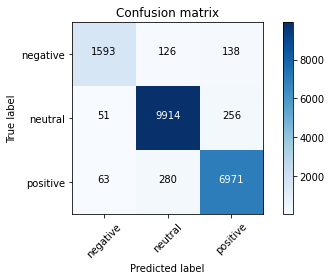

In [83]:
labels = le.classes_.tolist()
plt.figure()
plot_confusion_matrix(cm, classes=labels)

In [84]:
p, r, f1, s = precision_recall_fscore_support(y_test, y_pred, average=None)
results = pd.DataFrame({'1-Precision': p, '2-Recall': r, '3-F1 score': f1, '4-Support': s}, index=labels)
print(results.round(decimals=3))

          1-Precision  2-Recall  3-F1 score  4-Support
negative        0.933     0.858       0.894       1857
neutral         0.961     0.970       0.965      10221
positive        0.947     0.953       0.950       7314


In [85]:
n_classes = 3
lw = 2
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


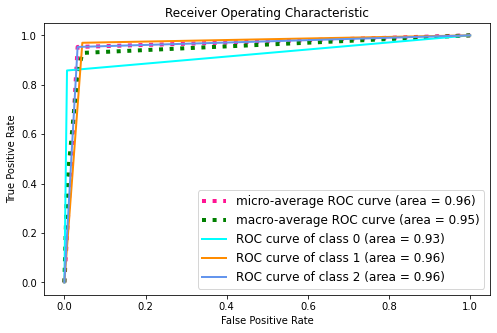

In [86]:
plt.figure(figsize=(8,5))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc=4, prop={'size': 12})
plt.show()
